# **Casos de Uso**
## Grupo 3
## Módulo: SQL

# <font color='blue'>__Caso de uso : Yisella Carrasco__</font>
## ***CENSO 2024***

INFORMACIÓN NO OFICIAL, NO PUBLICABLE, NO SE PUEDE USAR NI CONSIDERAR COMO REAL YA QUE NO HA SIDO COMPARADA CON LAS ESTADÍSTICAS PUBLICADAS POR EL ESTADO DE CHILE.

Durante, el año 2024 se levantó la información sobre el CENSO de población y vivienda, por lo cuál es bastante interesante poder explorar y analizar la información obtenida, en este caso de uso solo se hace una primer aproximación.

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
import sqlite3

# Conectar a la base de datos, como no existe se va a creae
conn = sqlite3.connect("Censo.db")
cursor = conn.cursor()

# Crear las tablas
tablas_sql = [
    """
    CREATE TABLE IF NOT EXISTS Poblacion_Censada (
        Codigo_Region INTEGER,
        Region TEXT,
        Codigo_Provincia INTEGER,
        Provincia TEXT,
        Codigo_Comuna INTEGER,
        Comuna TEXT,
        Grupo_Edad TEXT,
        Poblacion_Censada INTEGER,
        Hombres INTEGER,
        Mujeres INTEGER,
        Razon_Hombre_Mujer REAL,
        PRIMARY KEY (Codigo_Region, Codigo_Provincia, Codigo_Comuna, Grupo_Edad)
    );
    """,
    """
    CREATE TABLE IF NOT EXISTS Indice_Envejecimiento (
        Codigo_Region INTEGER,
        Region TEXT,
        Codigo_Provincia INTEGER,
        Provincia TEXT,
        Codigo_Comuna INTEGER,
        Comuna TEXT,
        Sexo TEXT,
        Poblacion_Censada INTEGER,
        Edad_0_14 INTEGER,
        Edad_15_64 INTEGER,
        Edad_65_mas INTEGER,
        Indice_Envejecimiento REAL,
        PRIMARY KEY (Codigo_Region, Codigo_Provincia, Codigo_Comuna, Sexo)
    );
    """,
    """
    CREATE TABLE IF NOT EXISTS Poblacion_Operativo (
        Codigo_Region INTEGER PRIMARY KEY,
        Region TEXT,
        Poblacion_Censada INTEGER,
        Poblacion_Vivienda_Particular INTEGER,
        Poblacion_Vivienda_Colectiva INTEGER,
        Poblacion_Situacion_Calle INTEGER
    );
    """,
    """
    CREATE TABLE IF NOT EXISTS Viviendas_Hogares (
        Codigo_Region INTEGER,
        Region TEXT,
        Codigo_Provincia INTEGER,
        Provincia TEXT,
        Codigo_Comuna INTEGER,
        Comuna TEXT,
        Hogares_Censados INTEGER,
        Promedio_Personas_Hogar REAL,
        PRIMARY KEY (Codigo_Region, Codigo_Provincia, Codigo_Comuna)
    );
    """
]

# Ejecutar las consultas
for query in tablas_sql:
    cursor.execute(query)

# Guardar cambios y cerrar conexión
conn.commit()
conn.close()

print("Base de datos y tablas creadas")

Base de datos y tablas creadas


In [ ]:
import sqlite3
import pandas as pd

# Nombre del archivo de la base de datos
db_name = "Censo.db"

# Diccionario con el nombre de la tabla y su archivo Excel correspondiente
archivos_excel = {
    "Poblacion_Censada": "Poblacion_Censada.xlsx",
    "Indice_Envejecimiento": "Indice_Envejecimiento.xlsx",
    "Poblacion_Operativo": "Poblacion_Operativo.xlsx",
    "Viviendas_Hogares": "Viviendas_Hogares.xlsx"
}

# Conectar a SQLite
conn = sqlite3.connect(db_name)

# Iterar sobre cada archivo y cargarlo en la base de datos
for tabla, archivo in archivos_excel.items():
    try:
        print(f" Cargando {archivo} en la tabla {tabla}...")

        df = pd.read_excel(archivo, engine="openpyxl")

        df.to_sql(tabla, conn, if_exists="append", index=False)

        print(f"Datos insertados en {tabla} exitosamente.")

    except Exception as e:
        print(f"Error al cargar {archivo}: {e}")

# Cerrar conexión
conn.close()
print("Proceso completado.")

 Cargando Poblacion_Censada.xlsx en la tabla Poblacion_Censada...
Datos insertados en Poblacion_Censada exitosamente.
 Cargando Indice_Envejecimiento.xlsx en la tabla Indice_Envejecimiento...
Datos insertados en Indice_Envejecimiento exitosamente.
 Cargando Poblacion_Operativo.xlsx en la tabla Poblacion_Operativo...
Datos insertados en Poblacion_Operativo exitosamente.
 Cargando Viviendas_Hogares.xlsx en la tabla Viviendas_Hogares...
Datos insertados en Viviendas_Hogares exitosamente.
Proceso completado.


In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect("Censo.db")

# Ver las primeras 5 filas de la tabla Poblacion_Censada
df = pd.read_sql_query("SELECT * FROM Poblacion_Censada LIMIT 5;", conn)
print(df)

# Cerrar la conexión
conn.close()

   Codigo_Region Region  Codigo_Provincia Provincia  Codigo_Comuna Comuna  \
0              0   País                 0      País              0   País   
1              0   País                 0      País              0   País   
2              0   País                 0      País              0   País   
3              0   País                 0      País              0   País   
4              0   País                 0      País              0   País   

  Grupo_Edad  Poblacion_Censada  Hombres  Mujeres  Razon_Hombre_Mujer  
0      0 a 4             870693   443028   427665               103.6  
1      5 a 9            1147515   584218   563297               103.7  
2    10 a 14            1256440   641284   615156               104.2  
3    15 a 19            1219347   625986   593361               105.5  
4    20 a 24            1273193   646831   626362               103.3  


In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect("Censo.db")

# Listar las tablas en la base de datos
tablas = ["Poblacion_Censada", "Indice_Envejecimiento", "Poblacion_Operativo", "Viviendas_Hogares"]

# Crear una lista para almacenar los resultados
resultados = []

# Iterar sobre las tablas y contar los registros
for tabla in tablas:
    query = f"SELECT COUNT(*) FROM {tabla};"
    count = pd.read_sql_query(query, conn)
    resultados.append({"Tabla": tabla, "Registros": count.iloc[0, 0]})

# Convertir los resultados en un DataFrame y mostrarlo como tabla
df_resultados = pd.DataFrame(resultados)
print(df_resultados)

# Cerrar la conexión
conn.close()

                   Tabla  Registros
0      Poblacion_Censada       6246
1  Indice_Envejecimiento        694
2    Poblacion_Operativo         17
3      Viviendas_Hogares        347


In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect("Censo.db")

# Promedio de la población censada por grupo de edad
df = pd.read_sql_query("SELECT Grupo_Edad, AVG(Poblacion_Censada) AS Promedio_Poblacion FROM Poblacion_Censada GROUP BY Grupo_Edad;", conn)
print(df)

# Cerrar la conexión
conn.close()

   Grupo_Edad  Promedio_Poblacion
0       0 a 4         5018.403458
1     10 a 14         7241.729107
2     15 a 19         7027.936599
3     20 a 24         7338.288184
4     25 a 29         7975.037464
5     30 a 34         8803.971182
6     35 a 39         8116.414986
7     40 a 44         7322.726225
8     45 a 49         6638.478386
9       5 a 9         6613.919308
10    50 a 54         6762.835735
11    55 a 59         6531.636888
12    60 a 64         6212.046110
13    65 a 69         5019.025937
14    70 a 74         3724.731988
15    75 a 79         2750.351585
16    80 a 84         1829.533141
17   85 o más         1588.391931


In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect("Censo.db")

# Población por región en la tabla Poblacion_Operativo
df = pd.read_sql_query("SELECT Region, SUM(Poblacion_Censada) AS Total_Poblacion FROM Poblacion_Operativo GROUP BY Region;", conn)
print(df)

# Cerrar la conexión
conn.close()

                                       Region  Total_Poblacion
0                                 Antofagasta           635416
1                          Arica y Parinacota           244569
2                                     Atacama           299180
3   Aysén del General Carlos Ibáñez del Campo           100745
4                                      Biobío          1613059
5                                    Coquimbo           832864
6                                La Araucanía          1010423
7       Libertador General Bernardo O'Higgins           987228
8                                   Los Lagos           890284
9                                    Los Ríos           398230
10       Magallanes y de la Antártica Chilena           166537
11                                      Maule          1123008
12                  Metropolitana de Santiago          7400741
13                                       País         18480432
14                                   Tarapacá          

In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect("Censo.db")

# Sumar población censada, excluyendo filas con Codigo_Region igual a 0
query = """
SELECT SUM(Poblacion_Censada) AS Poblacion_Total
FROM Poblacion_Censada
WHERE Codigo_Region != 0
"""
df = pd.read_sql_query(query, conn)

# Mostrar el resultado
poblacion_total = df['Poblacion_Total'][0]
print(f"Población total en el país: {poblacion_total:,.0f}")

# Cerrar la conexión
conn.close()


Población total en el país: 18,480,432


población censada y hogares censados por región

In [ ]:
import sqlite3
import pandas as pd

# Conectar a la base de datos
conn = sqlite3.connect("Censo.db")
query = """
SELECT
    o.Region,
    o.Poblacion_Censada,
    SUM(v.Hogares_Censados) AS Hogares_Censados
FROM
    Poblacion_Operativo o
INNER JOIN
    Viviendas_Hogares v ON o.Codigo_Region = v.Codigo_Region
GROUP BY
    o.Region, o.Poblacion_Censada
"""
df = pd.read_sql_query(query, conn)
print(df.head())

                                      Region  Poblacion_Censada  \
0                                Antofagasta             635416   
1                         Arica y Parinacota             244569   
2                                    Atacama             299180   
3  Aysén del General Carlos Ibáñez del Campo             100745   
4                                     Biobío            1613059   

   Hogares_Censados  
0            213747  
1             80620  
2            103057  
3             39964  
4            579170  


población censada por región y situación calle

In [ ]:
query = """
SELECT
    o.Region,
    o.Poblacion_Censada,
    o.Poblacion_Situacion_Calle
FROM
    Poblacion_Operativo o
GROUP BY
    o.Region, o.Poblacion_Censada, o.Poblacion_Situacion_Calle
"""
df = pd.read_sql_query(query, conn)
print(df.head())

                                      Region  Poblacion_Censada  \
0                                Antofagasta             635416   
1                         Arica y Parinacota             244569   
2                                    Atacama             299180   
3  Aysén del General Carlos Ibáñez del Campo             100745   
4                                     Biobío            1613059   

   Poblacion_Situacion_Calle  
0                       1477  
1                       1184  
2                        578  
3                        135  
4                       1177  


población censada y la población en viviendas particulares por región

In [ ]:
query = """
SELECT
    o.Region,
    o.Poblacion_Censada,
    SUM(o.Poblacion_Vivienda_Particular) AS Poblacion_Vivienda_Particular
FROM
    Poblacion_Operativo o
GROUP BY
    o.Region, o.Poblacion_Censada
"""
df = pd.read_sql_query(query, conn)
print(df.head())

                                      Region  Poblacion_Censada  \
0                                Antofagasta             635416   
1                         Arica y Parinacota             244569   
2                                    Atacama             299180   
3  Aysén del General Carlos Ibáñez del Campo             100745   
4                                     Biobío            1613059   

   Poblacion_Vivienda_Particular  
0                         628598  
1                         238842  
2                         296661  
3                          99521  
4                        1603376  


población censada por región y la cantidad de hogares censados

In [ ]:
query = """
SELECT
    o.Region,
    o.Poblacion_Censada,
    SUM(v.Hogares_Censados) AS Hogares_Censados
FROM
    Poblacion_Operativo o
INNER JOIN
    Viviendas_Hogares v ON o.Codigo_Region = v.Codigo_Region
GROUP BY
    o.Region, o.Poblacion_Censada
"""
df = pd.read_sql_query(query, conn)
print(df.head())

                                      Region  Poblacion_Censada  \
0                                Antofagasta             635416   
1                         Arica y Parinacota             244569   
2                                    Atacama             299180   
3  Aysén del General Carlos Ibáñez del Campo             100745   
4                                     Biobío            1613059   

   Hogares_Censados  
0            213747  
1             80620  
2            103057  
3             39964  
4            579170  


# <font color='blue'>__Caso de uso : Raúl Muñoz__</font>
## ***Sistema Logistico de Camiones***

El sistema de logística de camiones tiene como objetivo gestionar los viajes de transporte terrestre. Para ello, se definen las siguientes entidades:

* **Conductor**: Representa a la persona encargada de conducir el camión. Se registran datos como su identificador, nombre y número de licencia.

* **Camión**: Contiene la información de cada camión, incluyendo su identificador, modelo y capacidad de carga (en kilogramos).

* **Lugar**: Define los distintos puntos geográficos (ciudades o regiones) que se usan para indicar el origen y destino de los viajes. Cada lugar se identifica con un identificador, nombre y región.

* **Ruta**: Representa el trayecto entre dos lugares, especificando el punto de origen y destino (relacionados con la entidad Lugar) y la distancia del trayecto en kilómetros.

* **Viaje**: Asocia un camión y un conductor a una ruta en una fecha determinada, permitiendo registrar la realización de cada viaje.

Esta estructura permite responder a preguntas como:



1. ¿Qué viajes se han realizado en una fecha o por un conductor específico?
2. ¿Cuáles son los trayectos con mayor o menor distancia?
3. ¿Qué camión y conductor fueron asignados en un viaje determinado?






**MODELO RELACIONAL**

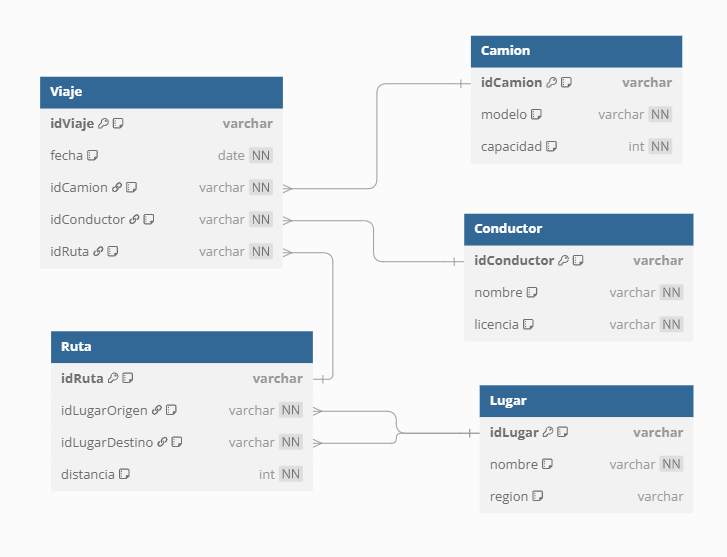

**CREACION DE TABLAS EN LA BD**

In [ ]:
import sqlite3
import pandas as pd

connection = sqlite3.connect("CasoUsoRaul.db")

cursor = connection.cursor()

##Tabla de Conductores
cursor.execute("""
CREATE TABLE Conductor (
    idConductor VARCHAR(10) PRIMARY KEY,
    nombre VARCHAR(30) NOT NULL,
    licencia VARCHAR(20) NOT NULL
);
""")

##Tabla de Camiones
cursor.execute("""
CREATE TABLE Camion (
    idCamion VARCHAR(10) PRIMARY KEY,
    modelo VARCHAR(30) NOT NULL,
    capacidad INT NOT NULL  -- Capacidad en kilogramos
);
""")

##Tabla de Lugares
cursor.execute("""
CREATE TABLE Lugar (
    idLugar VARCHAR(10) PRIMARY KEY,
    nombre VARCHAR(50) NOT NULL,
    region VARCHAR(50)  -- Opcional, para mayor detalle
);
""")

##Tabla de Rutas
##Se asocia un lugar de origen y un lugar de destino mediante sus respectivos idLugar
cursor.execute("""
CREATE TABLE Ruta (
    idRuta VARCHAR(10) PRIMARY KEY,
    idLugarOrigen VARCHAR(10) NOT NULL,
    idLugarDestino VARCHAR(10) NOT NULL,
    distancia INT NOT NULL,  -- Distancia en kilómetros
    FOREIGN KEY (idLugarOrigen) REFERENCES Lugar(idLugar),
    FOREIGN KEY (idLugarDestino) REFERENCES Lugar(idLugar)
);
""")

##Tabla de Viajes (asigna un camión y conductor a una ruta en una fecha determinada)
cursor.execute("""
CREATE TABLE Viaje (
    idViaje VARCHAR(10) PRIMARY KEY,
    fecha DATE NOT NULL,
    idCamion VARCHAR(10) NOT NULL,
    idConductor VARCHAR(10) NOT NULL,
    idRuta VARCHAR(10) NOT NULL,
    FOREIGN KEY (idCamion) REFERENCES Camion(idCamion),
    FOREIGN KEY (idConductor) REFERENCES Conductor(idConductor),
    FOREIGN KEY (idRuta) REFERENCES Ruta(idRuta)
);
""")

Verificacion de Tablas

In [ ]:
tablas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';",connection)
tablas

,name
0,Conductor
1,Camion
2,Lugar
3,Ruta
4,Viaje


**INSERCION DE DATOS**

In [ ]:
##Insertar Datos en la Tabla Conductor
cursor.execute("""
INSERT INTO Conductor (idConductor, nombre, licencia) VALUES
('C1', 'Juan Perez', 'LIC123'),
('C2', 'Maria Lopez', 'LIC456'),
('C3', 'Carlos Gomez', 'LIC789'),
('C4', 'Ana Torres', 'LIC321');
""")

 ##Insertar Datos en la Tabla Camion
cursor.execute("""
INSERT INTO Camion (idCamion, modelo, capacidad) VALUES
('T1', 'Volvo FH', 20000),
('T2', 'Scania R500', 25000),
('T3', 'Mercedes Actros', 18000),
('T4', 'Iveco Stralis', 22000);
""")

##Insertar Datos en la Tabla Lugar
cursor.execute("""
INSERT INTO Lugar (idLugar, nombre, region) VALUES
('L1', 'Santiago', 'Metropolitana'),
('L2', 'Valparaiso', 'Valparaíso'),
('L3', 'Concepcion', 'Biobío'),
('L4', 'La Serena', 'Coquimbo'),
('L5', 'Antofagasta', 'Antofagasta'),
('L6', 'Temuco', 'La Araucanía');
""")

## Insertar Datos en la Tabla Ruta
cursor.execute("""
INSERT INTO Ruta (idRuta, idLugarOrigen, idLugarDestino, distancia) VALUES
('R1', 'L1', 'L2', 120),
('R2', 'L1', 'L3', 500),
('R3', 'L2', 'L4', 350),
('R4', 'L3', 'L5', 800),
('R5', 'L4', 'L6', 600),
('R6', 'L5', 'L1', 900);
""")

## Insertar Datos en la Tabla Viaje

cursor.execute("""
INSERT INTO Viaje (idViaje, fecha, idCamion, idConductor, idRuta) VALUES
('V1', '2023-12-05', 'T1', 'C1', 'R1'),
('V2', '2023-12-06', 'T2', 'C2', 'R2'),
('V3', '2023-12-07', 'T3', 'C1', 'R3'),
('V4', '2023-12-08', 'T1', 'C3', 'R2'),
('V5', '2023-12-09', 'T4', 'C4', 'R4'),
('V6', '2023-12-10', 'T2', 'C2', 'R5'),
('V7', '2023-12-11', 'T3', 'C3', 'R6'),
('V8', '2023-12-12', 'T1', 'C1', 'R4');
""")

**CONSULTAS SQL**

1. Consulta general de viajes con detalles completos

In [ ]:
query = """
SELECT
    v.idViaje,
    v.fecha,
    cam.modelo AS ModeloCamion,
    con.nombre AS NombreConductor,
    orig.nombre AS Origen,
    dest.nombre AS Destino,
    r.distancia
FROM Viaje v
JOIN Camion cam ON v.idCamion = cam.idCamion
JOIN Conductor con ON v.idConductor = con.idConductor
JOIN Ruta r ON v.idRuta = r.idRuta
JOIN Lugar orig ON r.idLugarOrigen = orig.idLugar
JOIN Lugar dest ON r.idLugarDestino = dest.idLugar;
"""
df = pd.read_sql(query, connection)
df

,idViaje,fecha,ModeloCamion,NombreConductor,Origen,Destino,distancia
0,V1,2023-12-05,Volvo FH,Juan Perez,Santiago,Valparaiso,120
1,V2,2023-12-06,Scania R500,Maria Lopez,Santiago,Concepcion,500
2,V3,2023-12-07,Mercedes Actros,Juan Perez,Valparaiso,La Serena,350
3,V4,2023-12-08,Volvo FH,Carlos Gomez,Santiago,Concepcion,500
4,V5,2023-12-09,Iveco Stralis,Ana Torres,Concepcion,Antofagasta,800
5,V6,2023-12-10,Scania R500,Maria Lopez,La Serena,Temuco,600
6,V7,2023-12-11,Mercedes Actros,Carlos Gomez,Antofagasta,Santiago,900
7,V8,2023-12-12,Volvo FH,Juan Perez,Concepcion,Antofagasta,800


2. Consultar viajes realizados por un conductor específico

In [ ]:
##CONDUCTOR JUAN PEREZ
query = """
SELECT
    v.idViaje,
    v.fecha,
    cam.modelo AS ModeloCamion,
    con.nombre AS NombreConductor,
    orig.nombre AS Origen,
    dest.nombre AS Destino
FROM Viaje v
JOIN Camion cam ON v.idCamion = cam.idCamion
JOIN Conductor con ON v.idConductor = con.idConductor
JOIN Ruta r ON v.idRuta = r.idRuta
JOIN Lugar orig ON r.idLugarOrigen = orig.idLugar
JOIN Lugar dest ON r.idLugarDestino = dest.idLugar
WHERE con.nombre = 'Juan Perez';
"""
df = pd.read_sql(query, connection)
df

,idViaje,fecha,ModeloCamion,NombreConductor,Origen,Destino
0,V1,2023-12-05,Volvo FH,Juan Perez,Santiago,Valparaiso
1,V3,2023-12-07,Mercedes Actros,Juan Perez,Valparaiso,La Serena
2,V8,2023-12-12,Volvo FH,Juan Perez,Concepcion,Antofagasta


3. Consultar viajes cuyo origen sea una ciudad determinada

In [ ]:
##VIAJES CUYO ORIGEN SEA SANTIAGO
query = """
SELECT
    v.idViaje,
    v.fecha,
    cam.modelo AS ModeloCamion,
    con.nombre AS NombreConductor,
    orig.nombre AS Origen,
    dest.nombre AS Destino
FROM Viaje v
JOIN Camion cam ON v.idCamion = cam.idCamion
JOIN Conductor con ON v.idConductor = con.idConductor
JOIN Ruta r ON v.idRuta = r.idRuta
JOIN Lugar orig ON r.idLugarOrigen = orig.idLugar
JOIN Lugar dest ON r.idLugarDestino = dest.idLugar
WHERE orig.nombre = 'Santiago';
"""
df = pd.read_sql(query, connection)
df

,idViaje,fecha,ModeloCamion,NombreConductor,Origen,Destino
0,V1,2023-12-05,Volvo FH,Juan Perez,Santiago,Valparaiso
1,V2,2023-12-06,Scania R500,Maria Lopez,Santiago,Concepcion
2,V4,2023-12-08,Volvo FH,Carlos Gomez,Santiago,Concepcion




```
# This is formatted as code
```

# <font color='blue'>**Caso de uso: Hugo Tapia**</font>

## ***Cálculos asociados a balances económicos de potencia***

Para efectuar los balances económicos de potencia eléctrica en el mercado mayorista, el Coordinador Eléctrico debe recolectar información de consumos de clientes, inyecciones de potencia de centrales, y flujos en líneas de transmisión. Estos registros son valorizados a precios que dependen del mes y de la barra geográfica donde ocurren. Adicionalmente, el proceso debe ser completamente trazable para cualquier interesado que quiera reproducir el cálculo.

En el año 2010, se privilegiaba el uso de excel por su facilidad para registrar en un archivo todos los datos de entrada necesarios, pero se requería una forma eficiente de poder efectuar los cálculos, que en su mayoría se podían modelar como combinaciones de numerosas tablas de datos.

En esa época no existía todavía Power Query, pero sí las "tablas dinámicas", que ofrecían una gran flexibilidad para disponer de orígenes de datos a partir de consultas. Fue así como se implementaron consultas en lenguaje SQL que iban a leer las diversas tablas de datos que se encontraban en un archivo excel, y mediante consultas, subconsultas y agrupaciones, permitieron resolver por años el balance de potencia, de un modo trazable, preciso y muy eficiente en términos de tiempo de ejecución y recursos computacionales.

Como evidencias, comparto algunas imágenes del recurso utilizado, y ejemplo del código SQL implementado. Lo anterior muestra lo beneficioso que resulta la universalidad del lenguaje SQL para trabajar de manera flexible en diversos ecosistemas tecnológicos.


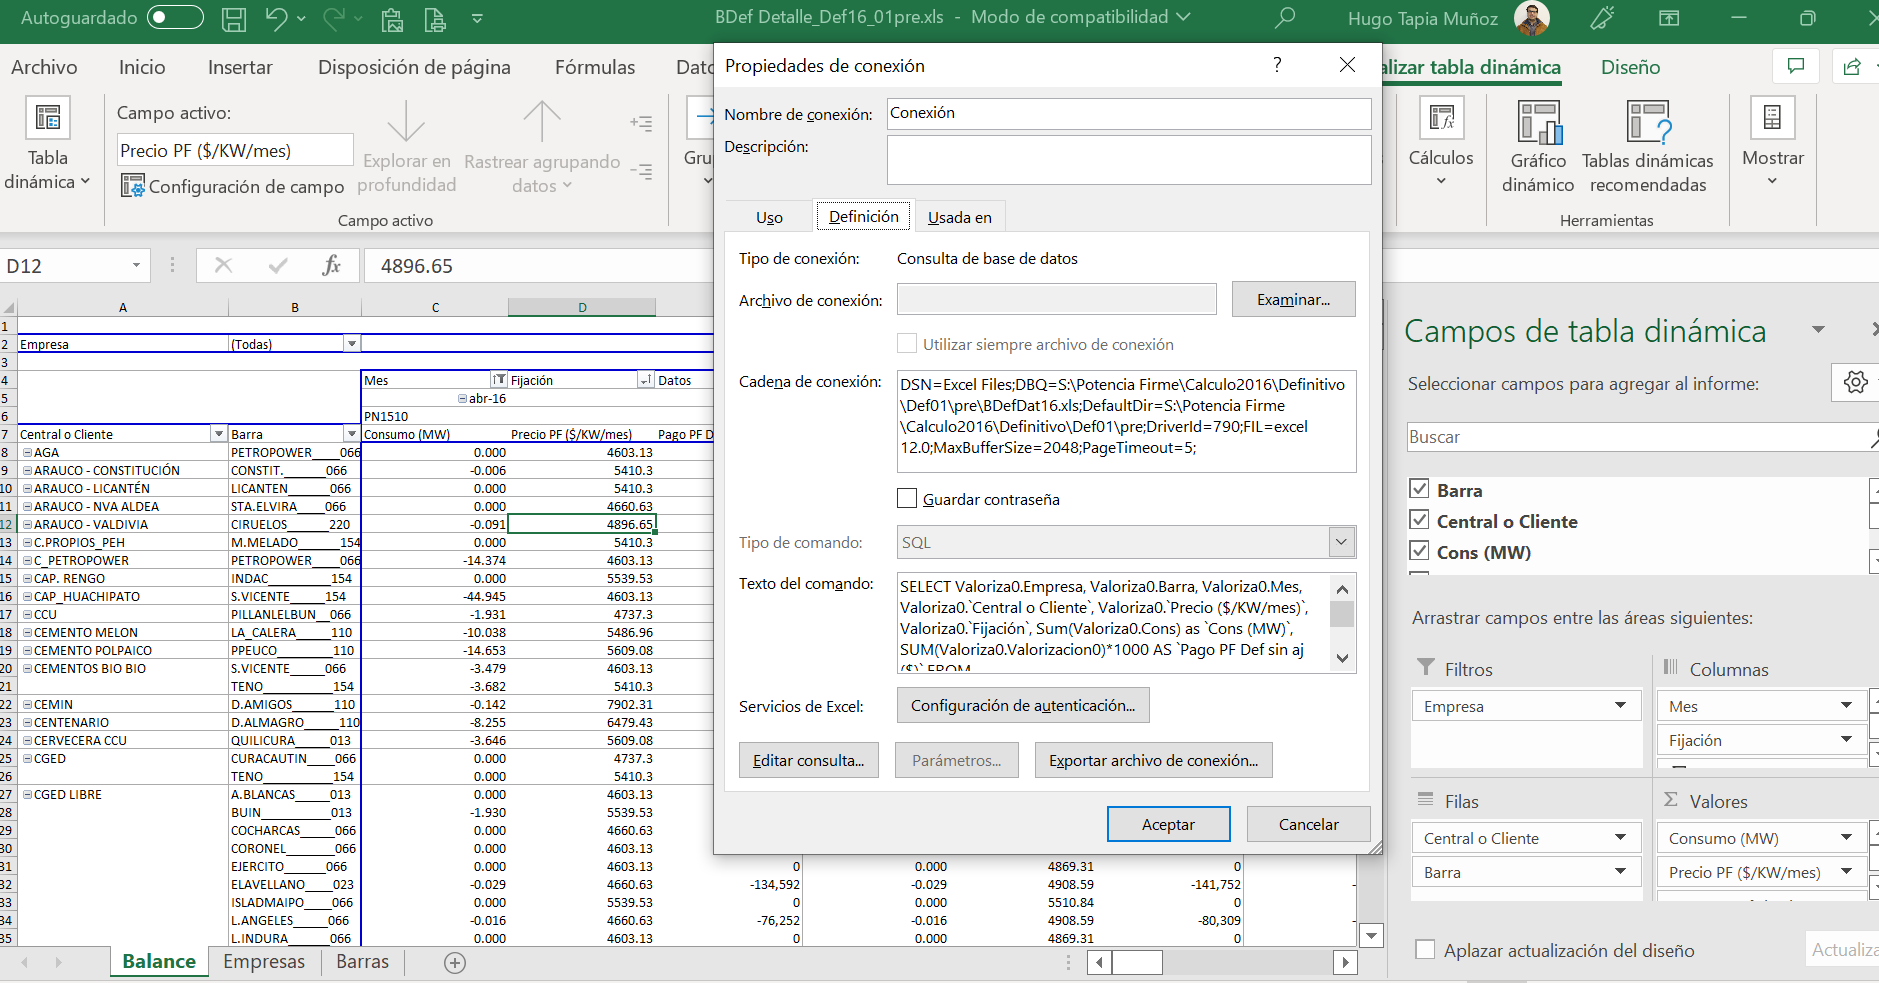

Ejemplo de Código en SQL colocado en zona "Texto del Comando":

```python

SELECT Valoriza0.Empresa, Valoriza0.Barra, Valoriza0.Mes, Valoriza0.`Central o Cliente`, Valoriza0.`Precio ($/KW/mes)`, Valoriza0.`Fijación`, Sum(Valoriza0.Cons) as `Cons (MW)`, SUM(Valoriza0.Valorizacion0)*1000 AS `Pago PF Def sin aj ($)` FROM
(SELECT * FROM
(SELECT Claves.Código, Claves.Barra, Claves.Empresa, Claves.`Central o Cliente`, Medidas.Mes, PNudo.`Precio ($/KW/mes)`, PNudo.`Fijación`, Medidas.Cons, PNudo.`Precio ($/KW/mes)`*Medidas.Cons AS Valorizacion0
FROM
   `BDefDat16`.Barras Barras,
   `BDefDat16`.Claves Claves,
   `BDefDat16`.Fijacion Fijacion,
   `BDefDat16`.PNudo PNudo,
   (SELECT Meses.Mes, Claves.Código, IIf(Meses.Mes<Claves.Mesi Or Meses.Mes>Claves.Mesf,0,Claves.`Cons + Perd (MW)`) AS Cons
   FROM
   `BDefDat16`.Claves,
   `BDefDat16`.Meses) AS Medidas
WHERE Barras.`Barra Troncal` = PNudo.`Barra Troncal` AND Fijacion.Fijación = PNudo.Fijación AND Medidas.Mes = Fijacion.Mes AND Barras.Barra = Claves.Barra AND Claves.Código = Medidas.Código AND  Fijacion.Fijación = Barras.Fijación AND Claves.IT=false AND Claves.Dist=false
)
UNION
(SELECT Claves.Código, Claves.Barra, IT.Empresa, IT.Sistema AS `Central o Cliente`, Medidas.Mes, PNudo.`Precio ($/KW/mes)`, PNudo.`Fijación`, Medidas.ConsIni*IT.Prorrata AS Cons, PNudo.`Precio ($/KW/mes)`*Medidas.ConsIni*IT.Prorrata AS Valorizacion0
FROM
   `BDefDat16`.Barras Barras,
   `BDefDat16`.Claves Claves,
   `BDefDat16`.Fijacion Fijacion,
   `BDefDat16`.IT IT,
   `BDefDat16`.PNudo PNudo,
   (SELECT Meses.Mes, Claves.Código, IIf(Meses.Mes<Claves.Mesi Or Meses.Mes>Claves.Mesf,0,Claves.`Cons + Perd (MW)`) AS ConsIni
   FROM
   `BDefDat16`.Claves,
   `BDefDat16`.Meses) AS Medidas
WHERE Barras.`Barra Troncal` = PNudo.`Barra Troncal` AND Fijacion.Fijación = PNudo.Fijación AND Medidas.Mes = Fijacion.Mes AND Barras.Barra = Claves.Barra AND Claves.Código = Medidas.Código AND IT.Mes = Medidas.Mes AND Fijacion.Fijación = Barras.Fijación AND IT.Mes = Fijacion.Mes AND Claves.Empresa = IT.Sistema
)
UNION
(SELECT Claves.Código, Claves.Barra, Distribuidoras.Empresa, Distribuidoras.Distribuidora AS `Central o Cliente`, Medidas.Mes, PNudo.`Precio ($/KW/mes)`, PNudo.`Fijación`, Medidas.ConsIni*Distribuidoras.Prorrata AS Cons , PNudo.`Precio ($/KW/mes)`*Medidas.ConsIni*Distribuidoras.Prorrata AS Valorizacion0
FROM
   `BDefDat16`.Barras Barras,
   `BDefDat16`.Claves Claves,
   `BDefDat16`.Distribuidoras Distribuidoras,
   `BDefDat16`.Fijacion Fijacion,
   `BDefDat16`.PNudo PNudo,
   (SELECT Meses.Mes, Claves.Código, IIf(Meses.Mes<Claves.Mesi Or Meses.Mes>Claves.Mesf,0,Claves.`Cons + Perd (MW)`) AS ConsIni
   FROM
   `BDefDat16`.Claves,
   `BDefDat16`.Meses) AS Medidas
WHERE Barras.`Barra Troncal` = PNudo.`Barra Troncal` AND Fijacion.Fijación = PNudo.Fijación AND Medidas.Mes = Fijacion.Mes AND Barras.Barra = Claves.Barra AND Claves.Código = Medidas.Código AND Distribuidoras.Mes = Medidas.Mes AND Fijacion.Fijación = Barras.Fijación AND Distribuidoras.Mes = Fijacion.Mes AND Claves.Empresa = Distribuidoras.Distribuidora
)) AS Valoriza0
GROUP BY Valoriza0.Empresa, Valoriza0.Barra, Valoriza0.Mes, Valoriza0.`Central o Cliente`, Valoriza0.`Precio ($/KW/mes)`, Valoriza0.`Fijación`

```


# <font color='blue'>__Caso de uso : Begoña Urtubia__</font>

## ***SQL en un coro independiente***


El ensamble Quodlibet, es un coro independiente y autogestionado de Santiago, Región Metropolitana. Se conforma por alrededor de 30 miembros, cantantes vocacionales, de todas las edades y origenes. En los ultimos meses se ha visto la necesidad de llevar un registro más acabado de asistencias y atrasos a ensayos, para conocer que tan ensayada está una obra, con el fin de tomar desciciones en referentes a permitir la asistencia a conciertos. Con esto, se ve una oportunidad de utilizar SQL para apoyar el registro y consulta de estos datos.

## Diagrama ER

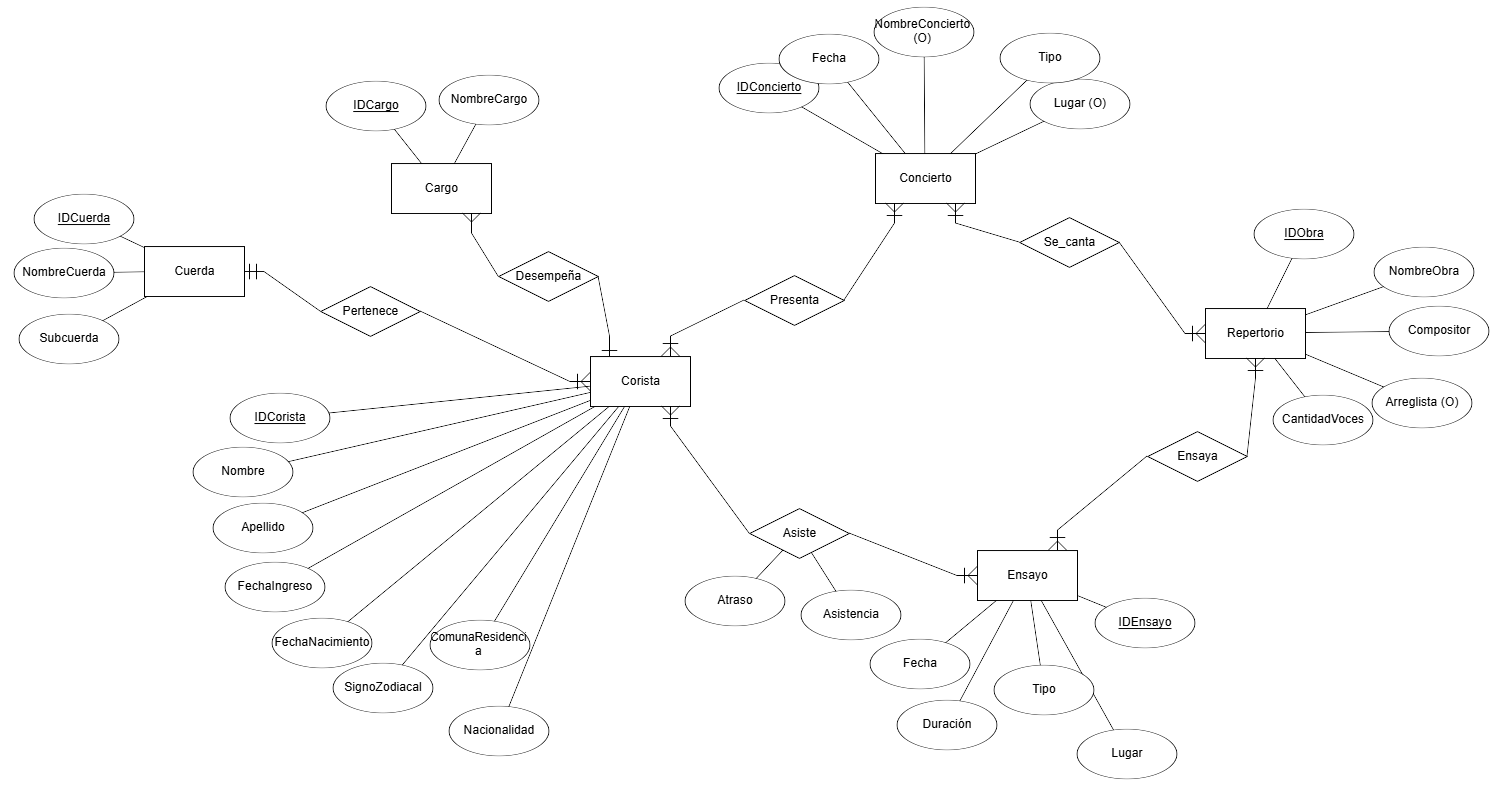

### Importación de librerías y creación de conección y cursor

Se importan las librerias `sqlite3` y `pandas` para hacer consultas y visualizar tablas de datos.

Tambien se crea la conexión a la base de datos y el cursor con el que se haran las consultas.

In [ ]:
import sqlite3
import pandas as pd

In [ ]:
connection = sqlite3.connect("coro.db")
cursor = connection.cursor()

### Creación de base de datos y tablas

Se crea la base de datos `coro` y las tablas necesarias para la gestión del grupo.

In [ ]:
cursor.execute("DROP TABLE IF EXISTS Concierto")
cursor.execute("DROP TABLE IF EXISTS Ensayo")
cursor.execute("DROP TABLE IF EXISTS Repertorio")
cursor.execute("DROP TABLE IF EXISTS Cuerda")
cursor.execute("DROP TABLE IF EXISTS Ensaya")
cursor.execute("DROP TABLE IF EXISTS Se_canta")
cursor.execute("DROP TABLE IF EXISTS Concierto_OtrosCoros")
cursor.execute("DROP TABLE IF EXISTS Corista")
cursor.execute("DROP TABLE IF EXISTS Cargo")
cursor.execute("DROP TABLE IF EXISTS Asiste")
cursor.execute("DROP TABLE IF EXISTS Presenta")

cursor.execute("""
    CREATE TABLE Concierto
(
  IDConcierto INT NOT NULL,
  Fecha DATE NOT NULL,
  Lugar VARCHAR(25),
  Tipo VARCHAR(15) NOT NULL,
  NombreConcierto VARCHAR(25),
  PRIMARY KEY (IDConcierto)
);
""")
cursor.execute("""
CREATE TABLE Ensayo
(
  IDEnsayo INT NOT NULL,
  Fecha DATE NOT NULL,
  Duracion INT NOT NULL,
  Lugar VARCHAR(25) NOT NULL,
  Tipo VARCHAR(15) NOT NULL,
  PRIMARY KEY (IDEnsayo)
);
""")
cursor.execute("""
CREATE TABLE Repertorio
(
  IDObra INT NOT NULL,
  NombreObra VARCHAR(50) NOT NULL,
  Compositor VARCHAR(50) NOT NULL,
  Arreglista VARCHAR(50),
  CantidadVoces INT NOT NULL,
  PRIMARY KEY (IDObra)
);
""")
cursor.execute("""
CREATE TABLE Cuerda
(
  IDCuerda INT NOT NULL,
  NombreCuerda VARCHAR(15) NOT NULL,
  Subcuerda INT NOT NULL,
  PRIMARY KEY (IDCuerda)
);
""")
cursor.execute("""
CREATE TABLE Ensaya
(
  IDEnsayo INT NOT NULL,
  IDObra INT NOT NULL,
  PRIMARY KEY (IDEnsayo, IDObra),
  FOREIGN KEY (IDEnsayo) REFERENCES Ensayo(IDEnsayo),
  FOREIGN KEY (IDObra) REFERENCES Repertorio(IDObra)
);
""")
cursor.execute("""
CREATE TABLE Se_canta
(
  IDObra INT NOT NULL,
  IDConcierto INT NOT NULL,
  PRIMARY KEY (IDObra, IDConcierto),
  FOREIGN KEY (IDObra) REFERENCES Repertorio(IDObra),
  FOREIGN KEY (IDConcierto) REFERENCES Concierto(IDConcierto)
);
""")
cursor.execute("""
CREATE TABLE Corista
(
  IDCorista INT NOT NULL,
  Nombre VARCHAR(20) NOT NULL,
  Apellido VARCHAR(20) NOT NULL,
  FechaNacimiento DATE NOT NULL,
  SignoZodiacal VARCHAR(20) NOT NULL,
  ComunaResidencia VARCHAR(20) NOT NULL,
  Nacionalidad VARCHAR(20) NOT NULL,
  FechaIngreso DATE NOT NULL,
  IDCuerda INT NOT NULL,
  IDCargo INT,
  PRIMARY KEY (IDCorista),
  FOREIGN KEY (IDCuerda) REFERENCES Cuerda(IDCuerda),
  FOREIGN KEY (IDCargo) REFERENCES Cargo(IDCargo)
);
""")
cursor.execute("""
CREATE TABLE Cargo
(
  IDCargo INT NOT NULL,
  NombreCargo VARCHAR(20) NOT NULL,
  PRIMARY KEY (IDCargo)
  );
""")
cursor.execute("""
CREATE TABLE Asiste
(
  Atraso VARCHAR(2) NOT NULL,
  Asistencia VARCHAR(2) NOT NULL,
  IDCorista INT NOT NULL,
  IDEnsayo INT NOT NULL,
  PRIMARY KEY (IDCorista, IDEnsayo),
  FOREIGN KEY (IDCorista) REFERENCES Corista(IDCorista),
  FOREIGN KEY (IDEnsayo) REFERENCES Ensayo(IDEnsayo)
);
""")
cursor.execute("""
CREATE TABLE Presenta
(
  IDCorista INT NOT NULL,
  IDConcierto INT NOT NULL,
  PRIMARY KEY (IDCorista, IDConcierto),
  FOREIGN KEY (IDCorista) REFERENCES Corista(IDCorista),
  FOREIGN KEY (IDConcierto) REFERENCES Concierto(IDConcierto)
);
""")
connection.commit()

Se verifica que las tablas se hayan creado correctamente, considerando las KeyID, ForeignID, columnas y tipos de datos. Para ello se visualizan utilizando `PRAGMA`

In [ ]:
tablas = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';",connection)
print(f"Esta base de datos contiene {len(tablas)} tablas: {', '.join(tablas['name'].values)}")

Esta base de datos contiene 12 tablas: LogAsistencia, sqlite_sequence, Concierto, Ensayo, Repertorio, Cuerda, Ensaya, Se_canta, Corista, Cargo, Asiste, Presenta


In [ ]:
for n in tablas["name"]:
  print("Nombre de Tabla: " + n)
  print("Columnas: ")
  display(pd.read_sql(f"PRAGMA table_info({n})",connection))
  print("\n")

Nombre de Tabla: LogAsistencia
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,LogID,INTEGER,0,None,1
1,1,Operacion,TEXT,0,None,0
2,2,FechaOperacion,DATETIME,0,CURRENT_TIMESTAMP,0
3,3,IDEnsayo,INT,0,None,0
4,4,IDCorista,INT,0,None,0




Nombre de Tabla: sqlite_sequence
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,name,,0,None,0
1,1,seq,,0,None,0




Nombre de Tabla: Concierto
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDConcierto,INT,1,None,1
1,1,Fecha,DATE,1,None,0
2,2,Lugar,VARCHAR(25),0,None,0
3,3,Tipo,VARCHAR(15),1,None,0
4,4,NombreConcierto,VARCHAR(25),0,None,0




Nombre de Tabla: Ensayo
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDEnsayo,INT,1,None,1
1,1,Fecha,DATE,1,None,0
2,2,Duracion,INT,1,None,0
3,3,Lugar,VARCHAR(25),1,None,0
4,4,Tipo,VARCHAR(15),1,None,0




Nombre de Tabla: Repertorio
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDObra,INT,1,None,1
1,1,NombreObra,VARCHAR(50),1,None,0
2,2,Compositor,VARCHAR(50),1,None,0
3,3,Arreglista,VARCHAR(50),0,None,0
4,4,CantidadVoces,INT,1,None,0




Nombre de Tabla: Cuerda
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDCuerda,INT,1,None,1
1,1,NombreCuerda,VARCHAR(15),1,None,0
2,2,Subcuerda,INT,1,None,0




Nombre de Tabla: Ensaya
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDEnsayo,INT,1,None,1
1,1,IDObra,INT,1,None,2




Nombre de Tabla: Se_canta
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDObra,INT,1,None,1
1,1,IDConcierto,INT,1,None,2




Nombre de Tabla: Corista
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDCorista,INT,1,None,1
1,1,Nombre,VARCHAR(20),1,None,0
2,2,Apellido,VARCHAR(20),1,None,0
3,3,FechaNacimiento,DATE,1,None,0
4,4,SignoZodiacal,VARCHAR(20),1,None,0
5,5,ComunaResidencia,VARCHAR(20),1,None,0
6,6,Nacionalidad,VARCHAR(20),1,None,0
7,7,FechaIngreso,DATE,1,None,0
8,8,IDCuerda,INT,1,None,0
9,9,IDCargo,INT,0,None,0




Nombre de Tabla: Cargo
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDCargo,INT,1,None,1
1,1,NombreCargo,VARCHAR(20),1,None,0




Nombre de Tabla: Asiste
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,Atraso,VARCHAR(2),1,None,0
1,1,Asistencia,VARCHAR(2),1,None,0
2,2,IDCorista,INT,1,None,1
3,3,IDEnsayo,INT,1,None,2




Nombre de Tabla: Presenta
Columnas: 


,cid,name,type,notnull,dflt_value,pk
0,0,IDCorista,INT,1,None,1
1,1,IDConcierto,INT,1,None,2


### Relleno de tablas
La tablas se rellenan con datos provenientes de archivos `.csv`.
Para ello se definen y utilizan las funciones `xlsx_to_csv` y `fill_tables_from_csv`.

In [ ]:
def xlsx_to_csv(file_path):
    # Leer todas las hojas del archivo Excel
    excel_file = pd.ExcelFile(file_path)
    sheet_names = excel_file.sheet_names  # Obtener los nombres de las hojas

    # Lista para almacenar los nombres de los archivos CSV creados
    csv_files = []

    # Iterar sobre cada hoja y convertirla en un archivo CSV
    for sheet in sheet_names:
        # Leer la hoja actual
        df = pd.read_excel(file_path, sheet_name=sheet)

        # Crear el nombre del archivo CSV basado en el nombre de la hoja
        csv_filename = f"{sheet}.csv"

        # Guardar el DataFrame como un archivo CSV
        df.to_csv(csv_filename, index=False)

        # Agregar el nombre del archivo CSV a la lista
        csv_files.append(csv_filename)
        print(f"Archivo CSV creado: {csv_filename}")

    # Retornar la lista de archivos CSV creados
    return csv_files


def fill_tables_from_csv(csv_files, db_path):
    """
    Rellena tablas existentes en una base de datos SQLite con datos de archivos CSV.

    Args:
        csv_files (list): Lista de nombres de archivos CSV.
        db_path (str): Ruta al archivo de base de datos SQLite.

    Returns:
        dict: Diccionario con el nombre de cada tabla y el número de registros insertados.
    """
    # Conexión a la base de datos SQLite
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()
    insert_summary = {}

    # Iterar sobre cada archivo CSV
    for csv_file in csv_files:
        try:
            # Leer el archivo CSV
            df = pd.read_csv(csv_file)

            # Obtener el nombre de la tabla de la base de datos (asumiendo que coincide con el nombre del archivo sin extensión)
            table_name = csv_file.split('.')[0]

            # Verificar si la tabla existe en la base de datos
            cursor.execute(f"SELECT name FROM sqlite_master WHERE type='table' AND name='{table_name}';")
            table_exists = cursor.fetchone()

            if not table_exists:
                raise Exception(f"La tabla '{table_name}' no existe en la base de datos.")

            # Insertar los datos en la tabla existente
            df.to_sql(table_name, conn, if_exists='append', index=False)

            # Obtener el número de registros insertados
            insert_summary[table_name] = len(df)
            print(f"Se insertaron {len(df)} registros en la tabla '{table_name}'.")

        except Exception as e:
            # Capturar errores y continuar con el siguiente archivo
            print(f"Error al insertar datos en la tabla '{table_name}' a partir del archivo '{csv_file}': {e}")
            insert_summary[table_name] = f"Error: {str(e)}"

    # Cerrar la conexión a la base de datos
    conn.close()

    return insert_summary

Ahora se utilizan las funciones definidas para rellenar las tablas.

In [ ]:
# Ruta del archivo Excel (puedes cambiarla según sea necesario)
xlsx_file_path = "/content/TablasCasoUso.xlsx"

# Llamar a la función para generar los CSV
lista_tablas = xlsx_to_csv(xlsx_file_path)

Archivo CSV creado: Cuerda.csv
Archivo CSV creado: Cargo.csv
Archivo CSV creado: Corista.csv
Archivo CSV creado: Ensayo.csv
Archivo CSV creado: Repertorio.csv
Archivo CSV creado: Concierto.csv
Archivo CSV creado: Se_canta.csv
Archivo CSV creado: Presenta.csv
Archivo CSV creado: Ensaya.csv
Archivo CSV creado: Asiste.csv


In [ ]:
# Lista de nombres de archivos CSV
csv_files = lista_tablas

# Ruta al archivo de la base de datos SQLite
db_path = "coro.db"

# Llamar a la rutina para rellenar las tablas
resultado = fill_tables_from_csv(csv_files, db_path)

# Mostrar el resumen de la operación
print("Resumen de la inserción:")
print(resultado)

Se insertaron 8 registros en la tabla 'Cuerda'.
Se insertaron 10 registros en la tabla 'Cargo'.
Se insertaron 28 registros en la tabla 'Corista'.
Se insertaron 51 registros en la tabla 'Ensayo'.
Se insertaron 10 registros en la tabla 'Repertorio'.
Se insertaron 10 registros en la tabla 'Concierto'.
Se insertaron 4 registros en la tabla 'Se_canta'.
Se insertaron 28 registros en la tabla 'Presenta'.
Se insertaron 16 registros en la tabla 'Ensaya'.
Se insertaron 140 registros en la tabla 'Asiste'.
Resumen de la inserción:
{'Cuerda': 8, 'Cargo': 10, 'Corista': 28, 'Ensayo': 51, 'Repertorio': 10, 'Concierto': 10, 'Se_canta': 4, 'Presenta': 28, 'Ensaya': 16, 'Asiste': 140}


Se rellenaron correctamente las tablas.

### Consultas

Ahora se hacen algunas consultas sencillas para evaluar el modelo.

**Consulta 1:** En esta consulta se buscan las tres comunas donde residen la mayor cantidad de coristas.

In [ ]:
query = """
SELECT ComunaResidencia, COUNT(*) as Cantidad FROM Corista
GROUP BY ComunaResidencia
ORDER BY Cantidad DESC
LIMIT 3
"""
pd.read_sql(query,connection)

,ComunaResidencia,Cantidad
0,Ñuñoa,8
1,Santiago Centro,6
2,Providencia,3


**Consulta 2:** En esta consulta se buscan los tres signos zodiacales más frecuentes entre los coristas. Una de las preguntas favoritas del grupo.

In [ ]:
query = """
SELECT SignoZodiacal, COUNT(*) as Cantidad FROM Corista
GROUP BY SignoZodiacal
ORDER BY Cantidad DESC
LIMIT 3
"""
pd.read_sql(query,connection)

,SignoZodiacal,Cantidad
0,Sagitario,5
1,Cancer,4
2,Acuario,4


**Consulta 3:** En esta consulta se buscan los coristas que tienen atrasos a ensayos, y la cantidad de ellos. Se define como atraso llegar 5 minutos tarde a ensayo.

In [ ]:
query = """
SELECT (Nombre||' '||Apellido) as NombreCompleto, COUNT(*) as CantidadAtrasos FROM Corista
WHERE IDCorista IN (
    SELECT IDCorista FROM Asiste
    WHERE Atraso = 'SI'
)
GROUP BY IDCorista
"""
pd.read_sql(query,connection)

,NombreCompleto,CantidadAtrasos
0,Catalina Silva,1
1,Amelia Villarroel,1
2,Valeria Oñate,1
3,Alexia Subercaseaux,1
4,Colomba Vicencio,1
5,Cristian Castillo,1
6,Juan Dominguez,1
7,Pedro Figueroa,1
8,Gabriel Solis,1


**Consulta 4:** En esta consulta se buscan los coristas que tienen inasistencias a ensayos, y la cantidad de ellos. Se define como inasistencia no asistir o llegar 30 minutos tarde a ensayo.

In [ ]:
query = """
SELECT (Nombre||' '||Apellido) as NombreCompleto, COUNT(*) as CantidadInasistencias FROM Corista
WHERE IDCorista IN (
    SELECT IDCorista FROM Asiste
    WHERE Asistencia = 'NO'
)
GROUP BY IDCorista
"""
pd.read_sql(query,connection)

,NombreCompleto,CantidadInasistencias
0,Alicia Hurtado,1
1,María Prado,1
2,Ornella Segovia,1
3,Iván Winter,1


**Consulta 5:** En esta consulta se busca el tiempo que el coro ha ensayado cada obra que se canta en el primer concierto.

In [ ]:
query = """
SELECT r.NombreObra, SUM(e.Duracion)/COUNT (DISTINCT r.NombreObra)  as TiempoEnsayo
FROM Ensayo e
INNER JOIN Ensaya en
ON e.IDEnsayo = en.IDEnsayo
INNER JOIN Repertorio r
ON en.IDObra = r.IDObra
WHERE r.IDObra IN (
    SELECT IDObra FROM Se_canta
    WHERE IDConcierto = 1
)
GROUP BY r.NombreObra
ORDER BY TiempoEnsayo DESC


"""
pd.read_sql(query,connection)

,NombreObra,TiempoEnsayo
0,The Conversion of Saul,11
1,Even When He is Silent,11
2,Riveder le Stelle,6
3,Arriba quemando el sol,6


### Creación de TRIGGERS

Creamos triggers para registrar cuando se hace un insert en la tabla Asiste

In [ ]:
cursor.execute("""
    CREATE TABLE IF NOT EXISTS LogAsistencia (
        LogID INTEGER PRIMARY KEY AUTOINCREMENT,
        Operacion TEXT,
        FechaOperacion DATETIME DEFAULT CURRENT_TIMESTAMP,
        IDEnsayo INT, IDCorista INT
    );
""")

In [ ]:
cursor.execute("""
    CREATE TRIGGER AfterInsertAsistencia
    AFTER INSERT ON Asiste
    BEGIN
        INSERT INTO LogAsistencia (Operacion, IDEnsayo, IDCorista)
        VALUES ('INSERT', NEW.IDEnsayo, NEW.IDCorista);
    END;
""")

In [ ]:
#se inserta inasistencia
cursor.execute("""
INSERT INTO Asiste (IDEnsayo, IDCorista, Atraso, Asistencia)
VALUES (6, 1, 'NO', 'NO');
""")
connection.commit()

In [ ]:
df_log = pd.read_sql("SELECT * FROM LogAsistencia", connection)
df_log

,LogID,Operacion,FechaOperacion,IDEnsayo,IDCorista
0,1,INSERT,2025-04-01 22:56:38,6,1
1,2,INSERT,2025-04-01 23:16:38,6,1
2,3,INSERT,2025-04-01 23:20:36,6,1


In [ ]:
pd.read_sql("SELECT * FROM Asiste", connection)

,Atraso,Asistencia,IDCorista,IDEnsayo
0,NO,SI,1,1
1,NO,NO,2,1
2,NO,SI,3,1
3,NO,SI,4,1
4,NO,SI,5,1
...,...,...,...,...
136,SI,SI,25,5
137,NO,SI,26,5
138,NO,SI,27,5
139,NO,SI,28,5
